# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import plot_tree 
from sklearn.tree import DecisionTreeClassifier
from numpy.random.mtrand import random_integers
from sklearn.preprocessing import LabelBinarizer



In [70]:
df = pd.read_csv('demo2.csv')

In [71]:
df['mau'] = df['mau'].astype(int)
df['qt_pessoas_residencia'] = df['qt_pessoas_residencia'].astype(int)
df = df.drop('qt_pessoas_residencia', axis=1)

In [72]:
y = df['mau']
x = df.drop('mau', axis=1)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [106]:
clf = DecisionTreeClassifier(random_state=100, max_depth=5, min_samples_leaf=10)


In [107]:
clf = clf.fit(x,y)


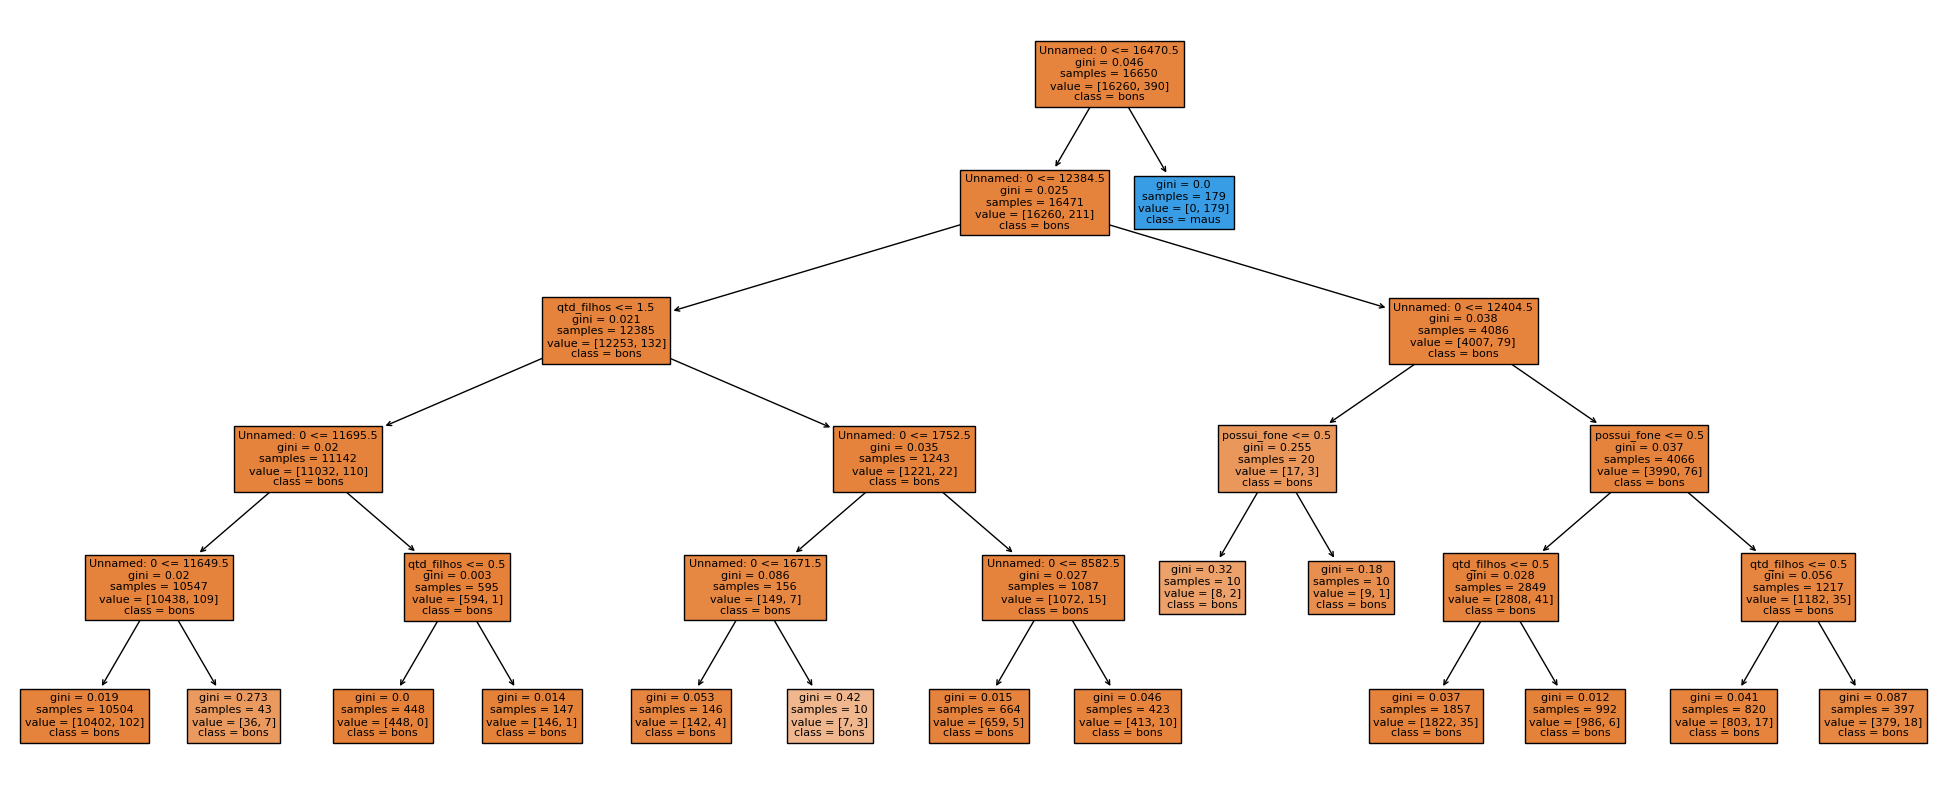

In [108]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['bons', 'maus'],
          feature_names=x.columns);

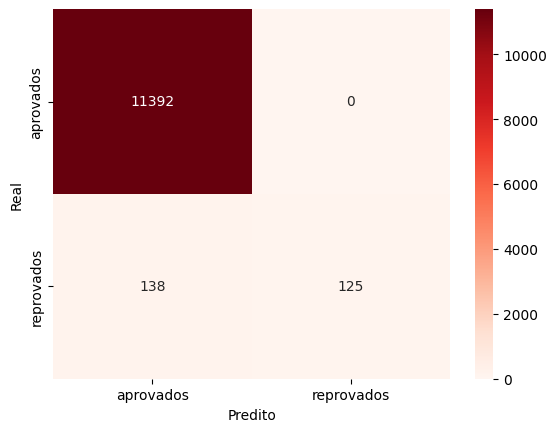

In [127]:
pred = clf.predict(X_train)
matriz = confusion_matrix(y_train, pred)

sns.heatmap(matriz, annot=True, fmt='d', cmap='Reds', xticklabels=['aprovados', 'reprovados'], yticklabels=['aprovados', 'reprovados'])
plt.xlabel('Predito')
plt.ylabel('Real');

In [128]:
accuracy_score(y_train, pred)

0.9881595881595882

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [122]:
pred_test = clf.predict(X_test)

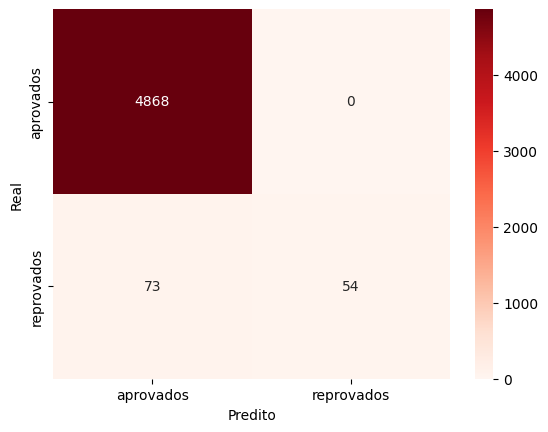

In [123]:
matriz = confusion_matrix(y_test, pred_test)

sns.heatmap(matriz, annot=True, fmt='d', cmap='Reds', xticklabels=['aprovados', 'reprovados'], yticklabels=['aprovados', 'reprovados'])
plt.xlabel('Predito')
plt.ylabel('Real');

In [136]:
print('base de teste:    ', accuracy_score(y_test, pred_test))
print('base treinamento: ', accuracy_score(y_train, pred))

base de teste:     0.9853853853853853
base treinamento:  0.9881595881595882


In [146]:
clf2 = DecisionTreeClassifier(random_state=123, max_depth=10, min_samples_leaf=5)
clf2 = clf2.fit(x,y)

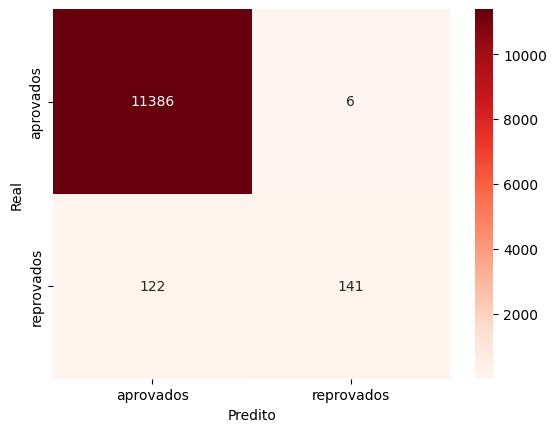

In [147]:
predict = clf2.predict(X_train)
matriz2 = confusion_matrix(y_train, predict)

sns.heatmap(matriz2, annot=True, fmt='d', cmap='Reds', xticklabels=['aprovados', 'reprovados'], yticklabels=['aprovados', 'reprovados'])
plt.xlabel('Predito')
plt.ylabel('Real');

In [161]:
maus = np.sum(predict)/len(predict)
maus

0.012612612612612612

In [158]:
1-y_test.mean()


0.9774345774345774